In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
articles = pd.read_csv('data/articles.csv')
customers = pd.read_csv('data/customers.csv')
transactions = pd.read_csv('data/transactions_train.csv')
pd.set_option('display.max_columns', None)

In [4]:
# Reduce file size

transactions['price'] = transactions['price'].astype('float32')
transactions['sales_channel_id'] = transactions['sales_channel_id'].astype('int8')
transactions['customer_id'] = transactions['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
customers['customer_id'] = customers['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
transactions['article_id'] = transactions['article_id'].astype('int32')
articles['article_id'] = articles['article_id'].astype('int32')

# EDA

## Articles EDA

In [5]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


### column details
25 columns in total
-	1x Article id
-	2x Product name + unique id
-	2x Product type name + unique id
-	1x Product group name
-	2x Graphical appearance name + unique id
-	6x Color names + unique id
-	2x Department name + unique id
-	2x Index name + unique id
-	2x Index group name + unique id
-	2x Section name + unique id
-	2x Garment group name + unique id
-	1x Detail (should be split)

In [8]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [9]:
print(f"Number of articles: \t{articles.shape[0]}")
print(f"Number of products: \t{articles['product_code'].unique().shape[0]}")
print(f"Ratio of article to product: \t{articles.shape[0] / articles['product_code'].unique().shape[0]}")

Number of articles: 	105542
Number of products: 	47224
Ratio of article to product: 	2.2349229205488736


#### Top 4 columns were removed due to their large size

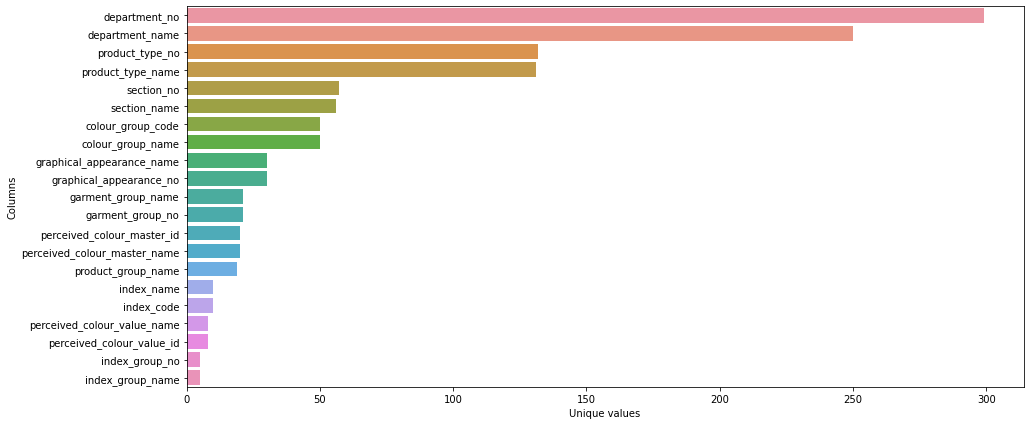

In [60]:
f, ax = plt.subplots(figsize=(15, 7))
# ax = plt.plot
unique_count = articles.T.apply(lambda x: x.nunique(), axis=1).reset_index()
unique_count.columns = ['column', 'unique_count']
unique_count = unique_count.sort_values('unique_count', ascending=False)
ax = sns.barplot(data=unique_count[4:], x='unique_count', y='column')
ax.set_xlabel('Unique values')
ax.set_ylabel('Columns')
plt.show()

#### Garment Upper body is the most popular group name

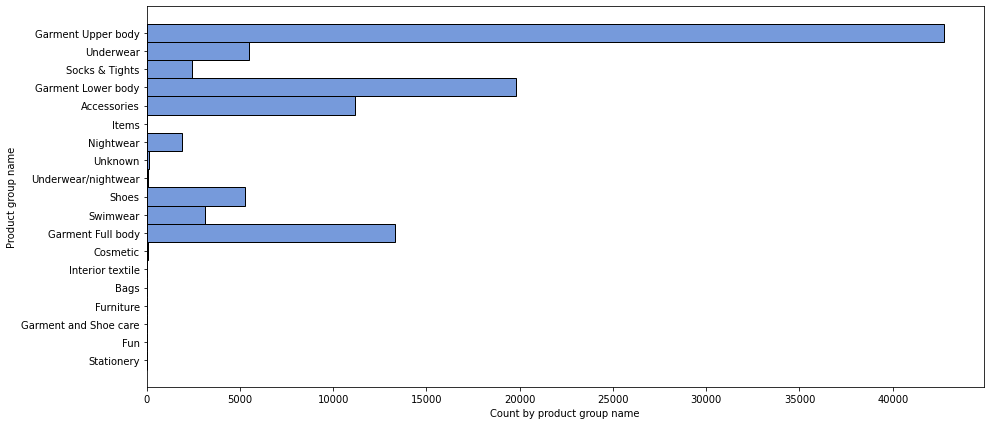

In [68]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(articles, y='product_group_name')
ax.set_xlabel('Count by product group name')
ax.set_ylabel('Product group name')
plt.show()

#### Ladieswear and Baby/Children are the most popular index groups

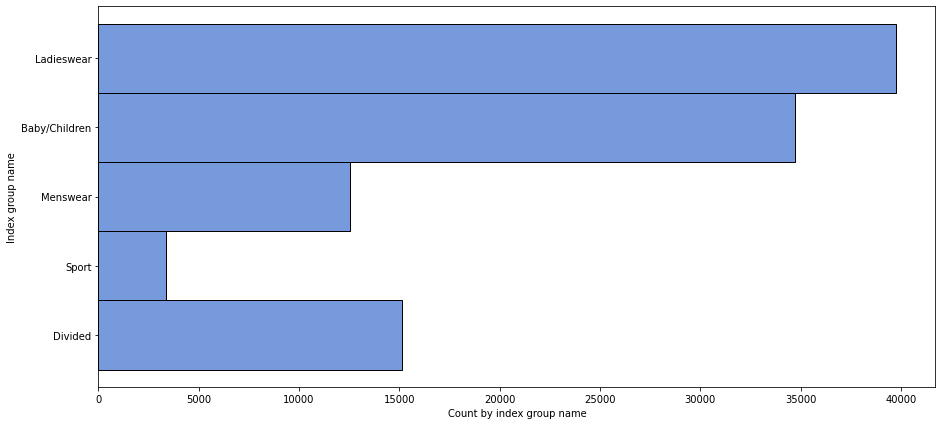

In [63]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(articles, y='index_group_name')
ax.set_xlabel('Count by index group name')
ax.set_ylabel('Index group name')
plt.show()

#### Ladieswear is the most popular index

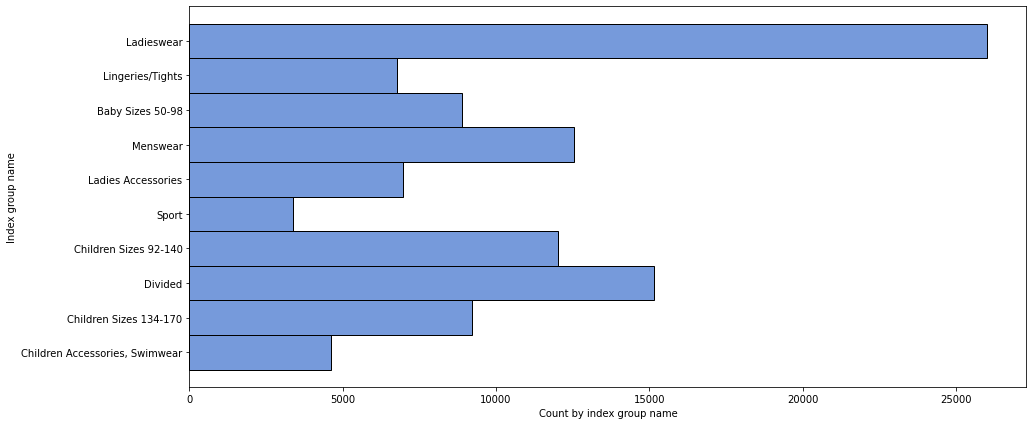

In [64]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(articles, y='index_name')
ax.set_xlabel('Count by index group name')
ax.set_ylabel('Index group name')
plt.show()

#### Every index belongs to one index group with no overlap

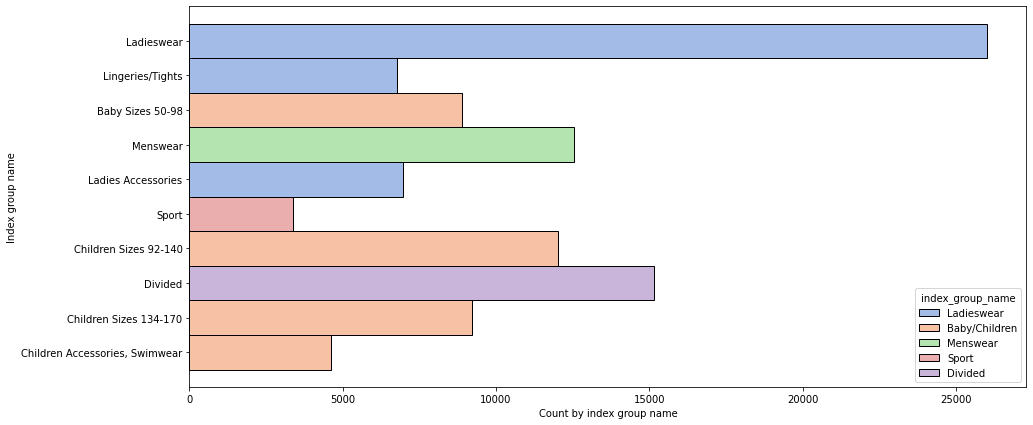

In [65]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(articles, y='index_name', hue='index_group_name')
ax.set_xlabel('Count by index name')
ax.set_ylabel('Index name')
plt.show()

#### The most popular perceived colors are Black followed by Blue then white

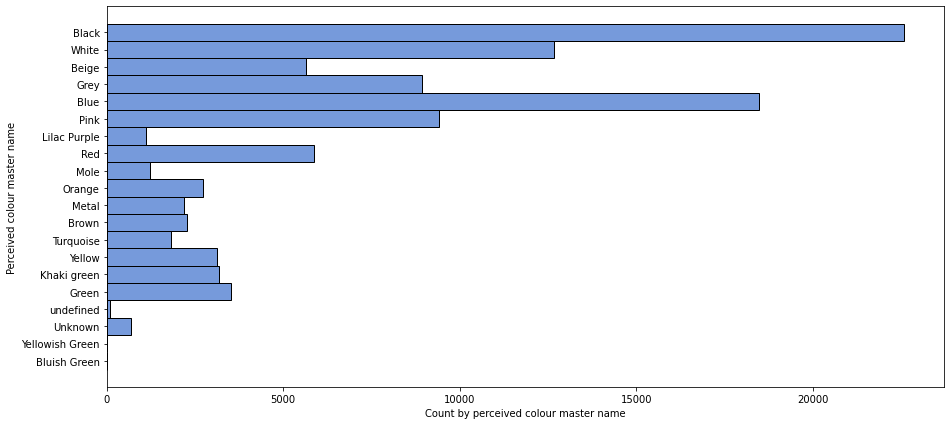

In [84]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(articles, y='perceived_colour_master_name')
ax.set_xlabel('Count by perceived colour master name')
ax.set_ylabel('Perceived colour master name')
plt.show()

#### Dark is the most common color value

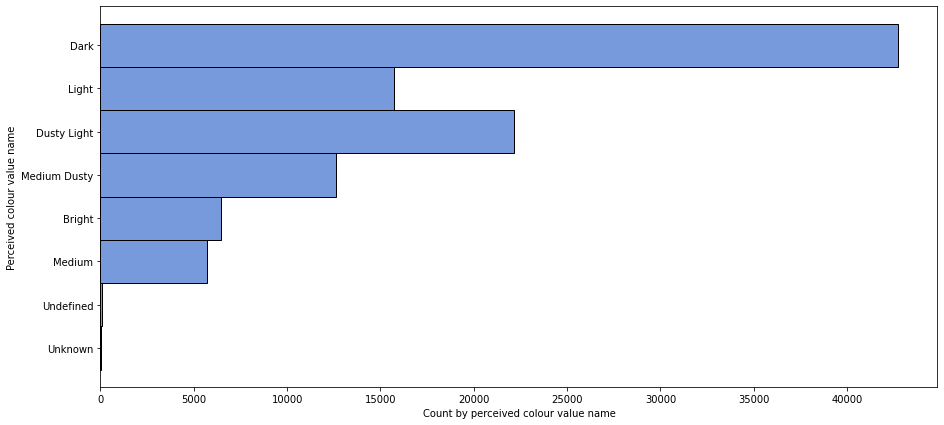

In [85]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(articles, y='perceived_colour_value_name')
ax.set_xlabel('Count by perceived colour value name')
ax.set_ylabel('Perceived colour value name')
plt.show()

## Transaction EDA

In [109]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,-6846340800584936,663713001,0.050831,2
1,2018-09-20,-6846340800584936,541518023,0.030492,2
2,2018-09-20,-8334631767138808638,505221004,0.015237,2
3,2018-09-20,-8334631767138808638,685687003,0.016932,2
4,2018-09-20,-8334631767138808638,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,4685485978980270934,929511001,0.059305,2
31788320,2020-09-22,4685485978980270934,891322004,0.042356,2
31788321,2020-09-22,3959348689921271969,918325001,0.043203,1
31788322,2020-09-22,-8639340045377511665,833459002,0.006763,1


In [118]:
print(f'{transactions["t_dat"].unique().shape[0]} dates available between {transactions["t_dat"].min()} and {transactions["t_dat"].max()}')

734 dates available between 2018-09-20 and 2020-09-22


C:\Users\aamaj\AppData\Local\Temp\ipykernel_24088\467982472.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


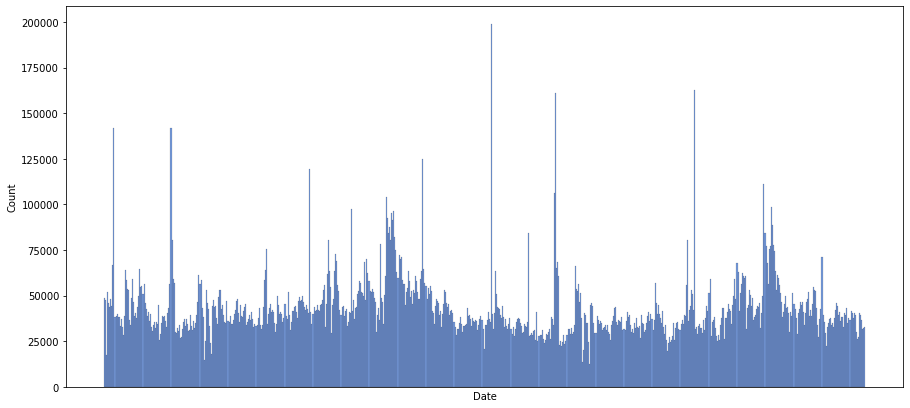

In [113]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(transactions, x = 't_dat')
ax.set_xlabel('Date')
ax.set_xticks([])
plt.show()

#### On average every article has been purchased 300 times

In [127]:
transactions.value_counts(subset=['article_id']).describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
dtype: float64

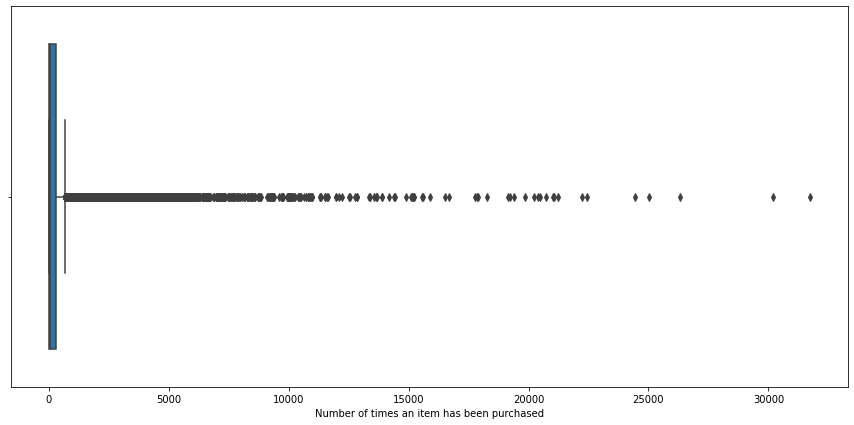

In [114]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x=transactions.value_counts(subset=['article_id']).values[2:])
ax.set_xlabel('Number of times an item has been purchased')
plt.show()

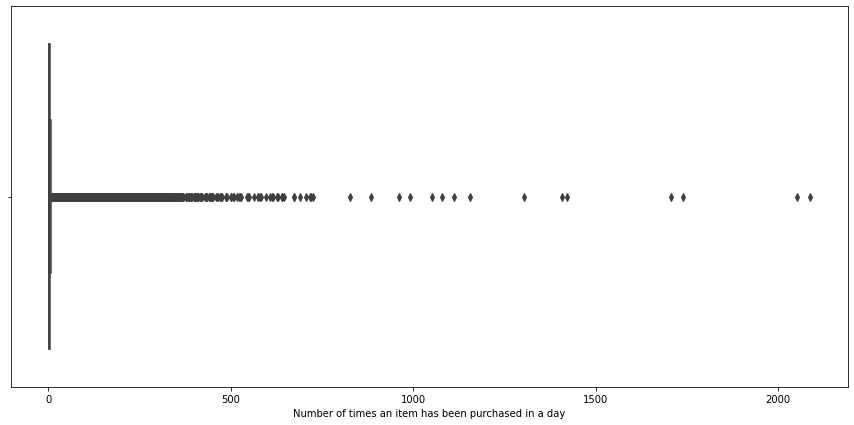

In [115]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x=transactions.value_counts(subset=['article_id', 't_dat']).values[2:])
ax.set_xlabel('Number of times an item has been purchased in a day')
plt.show()

## Customers EDA

In [107]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


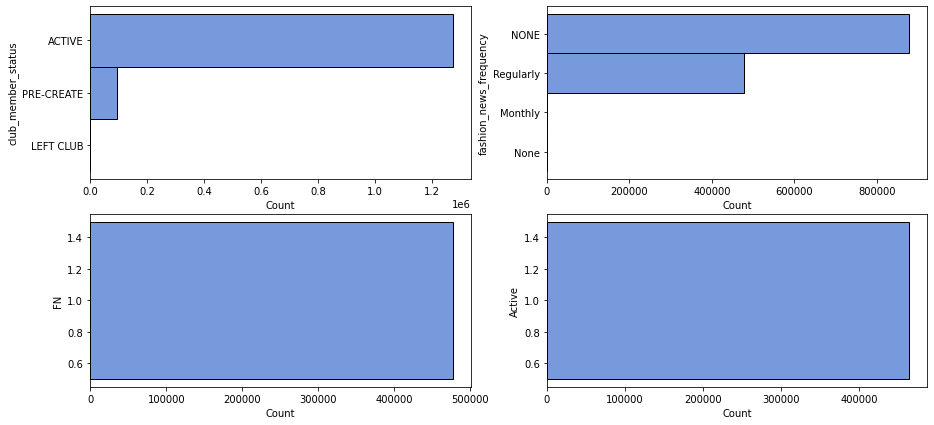

In [100]:
f, ax = plt.subplots(2, 2, figsize=(15, 7))
sns.histplot(data= customers, y='club_member_status', ax= ax[0, 0])
sns.histplot(data= customers, y='fashion_news_frequency', ax=ax[0, 1])
sns.histplot(data= customers, y='FN', ax= ax[1, 0])
sns.histplot(data= customers, y='Active', ax=ax[1, 1])
plt.show()

In [108]:
print(f'Missing FN value count {customers["FN"].isna().sum()} out of {customers.shape[0]}')
print(f'Missing Active value count {customers["Active"].isna().sum()} out of {customers.shape[0]}')

Missing FN value count 895050 out of 1371980
Missing Active value count 907576 out of 1371980


#### Most popular ages are 20, 21 and 24

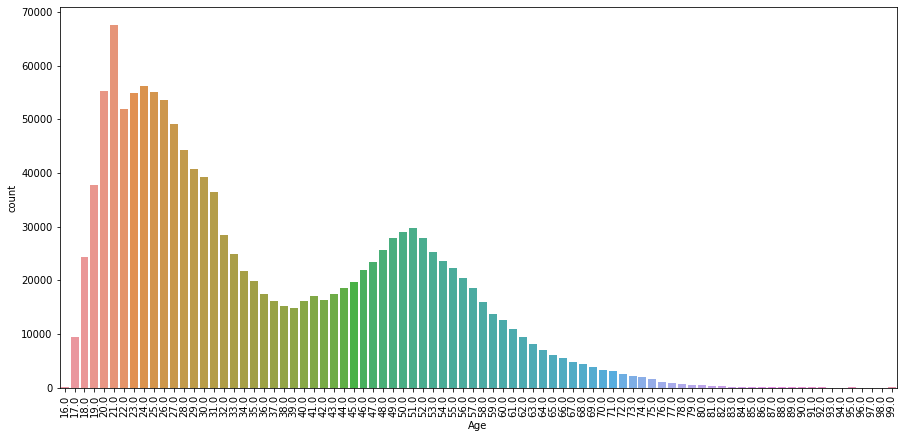

In [112]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x='age', data=customers)
ax.set_xlabel('Age')
plt.xticks(rotation=90)
plt.show()

# Questions/Hypothesis

## Do customers buy same items multiple times?

In [119]:
print(f"Total transactions {transactions.shape[0]}")
print(
    f"Repeat transactions by same customer at any time {transactions.duplicated(subset=['customer_id', 'article_id'], keep=False).sum()}")
print(
    f"Repeat transactions by same customer in one day {transactions.duplicated(subset=['t_dat', 'customer_id', 'article_id'], keep=False).sum()}")

Total transactions 31788324
Repeat transactions by same customer at any time 7997298
Repeat transactions by same customer in one day 5930773


## Number of orders per person in a day

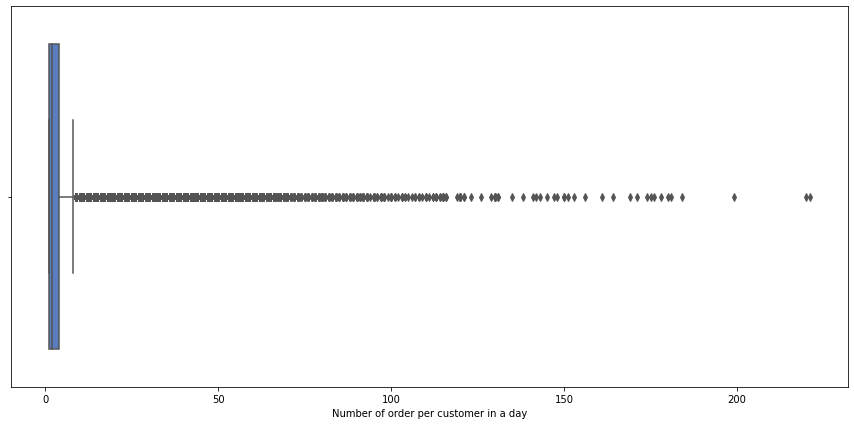

In [120]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x=transactions.value_counts(subset=['t_dat', 'customer_id']).values[2:])
ax.set_xlabel('Number of order per customer in a day')
plt.show()

## Customers are consistent in buying female/male clothes (Have to be confirmed with more accurate data but seems correct)

In [121]:
transaction_merged = pd.merge(transactions, articles[['article_id', 'index_group_no', 'index_group_name']],
                              on='article_id')
transaction_merged.head()

,t_dat,customer_id,article_id,price,sales_channel_id,index_group_no,index_group_name
0,2018-09-20,-6846340800584936,663713001,0.050831,2,1,Ladieswear
1,2018-09-20,-6926969535689290580,663713001,0.049475,2,1,Ladieswear
2,2018-09-20,-4643965588879717759,663713001,0.050831,2,1,Ladieswear
3,2018-09-20,-270519033320641874,663713001,0.050831,1,1,Ladieswear
4,2018-09-20,5082503806508933491,663713001,0.050831,2,1,Ladieswear


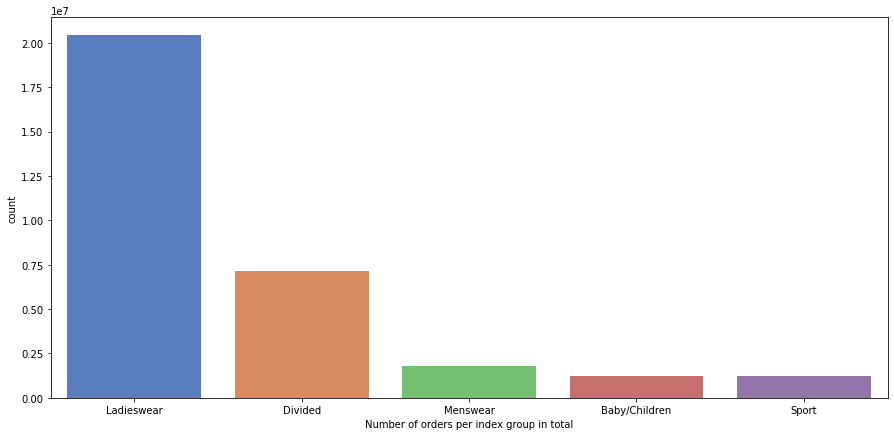

In [122]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x='index_group_name', data=transaction_merged)
ax.set_xlabel('Number of orders per index group in total')
plt.show()

In [123]:
index_values = transaction_merged.groupby('customer_id', as_index=False)['index_group_name'].value_counts()
s = index_values.sort_values('count', ascending=False).drop_duplicates(['customer_id'])
s.value_counts(subset=['index_group_name'])

index_group_name
Ladieswear          986901
Divided             233282
Baby/Children        55880
Menswear             55583
Sport                30635
dtype: int64

## There are always items trending each week/month

In [125]:
dates = transactions['t_dat'].unique().tolist()
x = 3
avg = []
for i in range(0, len(dates)- 7, 7):
    topx = transactions[transactions['t_dat'].isin(dates[i: i+7])][['t_dat', 'customer_id','article_id']].drop_duplicates()['article_id'].value_counts().values.tolist()[:x]
    unique_customers = transactions[transactions['t_dat'].isin(dates[i: i+7])]['customer_id'].nunique()
    topx_perc = [round(x/unique_customers*1000)/10 for x in topx]
    # print(f"{topx}\t{topx_perc}\tNUnique Customers: {unique_customers}")
    avg.append(sum(topx_perc))
print(f'Average popularity of top 3 weekly items are {sum(avg)/len(avg)}')
# Max was 3% with about 1% average

Average popularity of top 3 weekly items are 2.6019230769230766


In [126]:
avg = []
for i in range(0, len(dates)- 28, 28):
    topx = transactions[transactions['t_dat'].isin(dates[i: i+28])][['t_dat', 'customer_id','article_id']].drop_duplicates()['article_id'].value_counts().values.tolist()[:x]
    unique_customers = transactions[transactions['t_dat'].isin(dates[i: i+28])]['customer_id'].nunique()
    topx_perc = [round(x/unique_customers*1000)/10 for x in topx]
    # print(f"{topx}\t{topx_perc}\tNUnique Customers: {unique_customers}")
    avg.append(sum(topx_perc))
print(f'Average popularity of top 3 monthly items are {sum(avg)/len(avg)}')


Average popularity of top 3 monthly items are 2.5
